# __Heart Disease Prediction – Part 3__

# __Decision Trees__

## __Importing the Necessary Libraries__

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, KFold, GridSearchCV  # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib.legend_handler import HandlerLine2D

## __Using the stored df from part 1__

In [2]:
%store -r df_shuffle
df = df_shuffle
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
1,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
2,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
3,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
4,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


## __Creating and Obtaining a Test Set__

### __Obtaining the DataSet__

In [3]:
X = df.iloc[:,:-1]
y = df['target']

### __Spliting the Dataset__

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## __Decision Tree__

In [5]:
def getPerformanceMetric(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
    print(classification_report(y, y_pred))

    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.figure(figsize=[6,4])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    print()

### __J48 Algorithm__

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf_dt.predict(X_test)

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


tn: 24  fp:  16  fn:  9  tp:  42
              precision    recall  f1-score   support

           0       0.73      0.60      0.66        40
           1       0.72      0.82      0.77        51

    accuracy                           0.73        91
   macro avg       0.73      0.71      0.71        91
weighted avg       0.73      0.73      0.72        91




<Figure size 432x288 with 0 Axes>

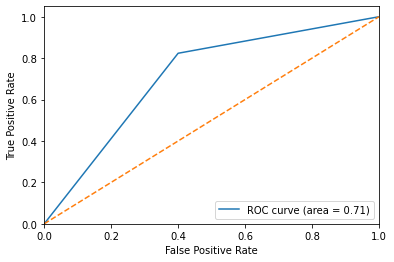

In [8]:
getPerformanceMetric(y_test, y_pred)

[Text(2368.0975609756097, 1026.8, 'X[11] <= 0.5\ngini = 0.497\nsamples = 212\nvalue = [98, 114]'),
 Text(1360.9756097560976, 906.0, 'X[12] <= 2.5\ngini = 0.358\nsamples = 120\nvalue = [28, 92]'),
 Text(925.4634146341464, 785.2, 'X[3] <= 167.0\ngini = 0.176\nsamples = 82\nvalue = [8, 74]'),
 Text(816.5853658536585, 664.4, 'X[4] <= 311.5\ngini = 0.139\nsamples = 80\nvalue = [6, 74]'),
 Text(544.390243902439, 543.6, 'X[9] <= 3.55\ngini = 0.079\nsamples = 73\nvalue = [3, 70]'),
 Text(435.5121951219512, 422.79999999999995, 'X[3] <= 109.0\ngini = 0.054\nsamples = 72\nvalue = [2, 70]'),
 Text(217.7560975609756, 302.0, 'X[0] <= 46.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(108.8780487804878, 181.19999999999993, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(326.6341463414634, 181.19999999999993, 'X[4] <= 245.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(217.7560975609756, 60.399999999999864, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(435.5121951219512, 60.39999999999

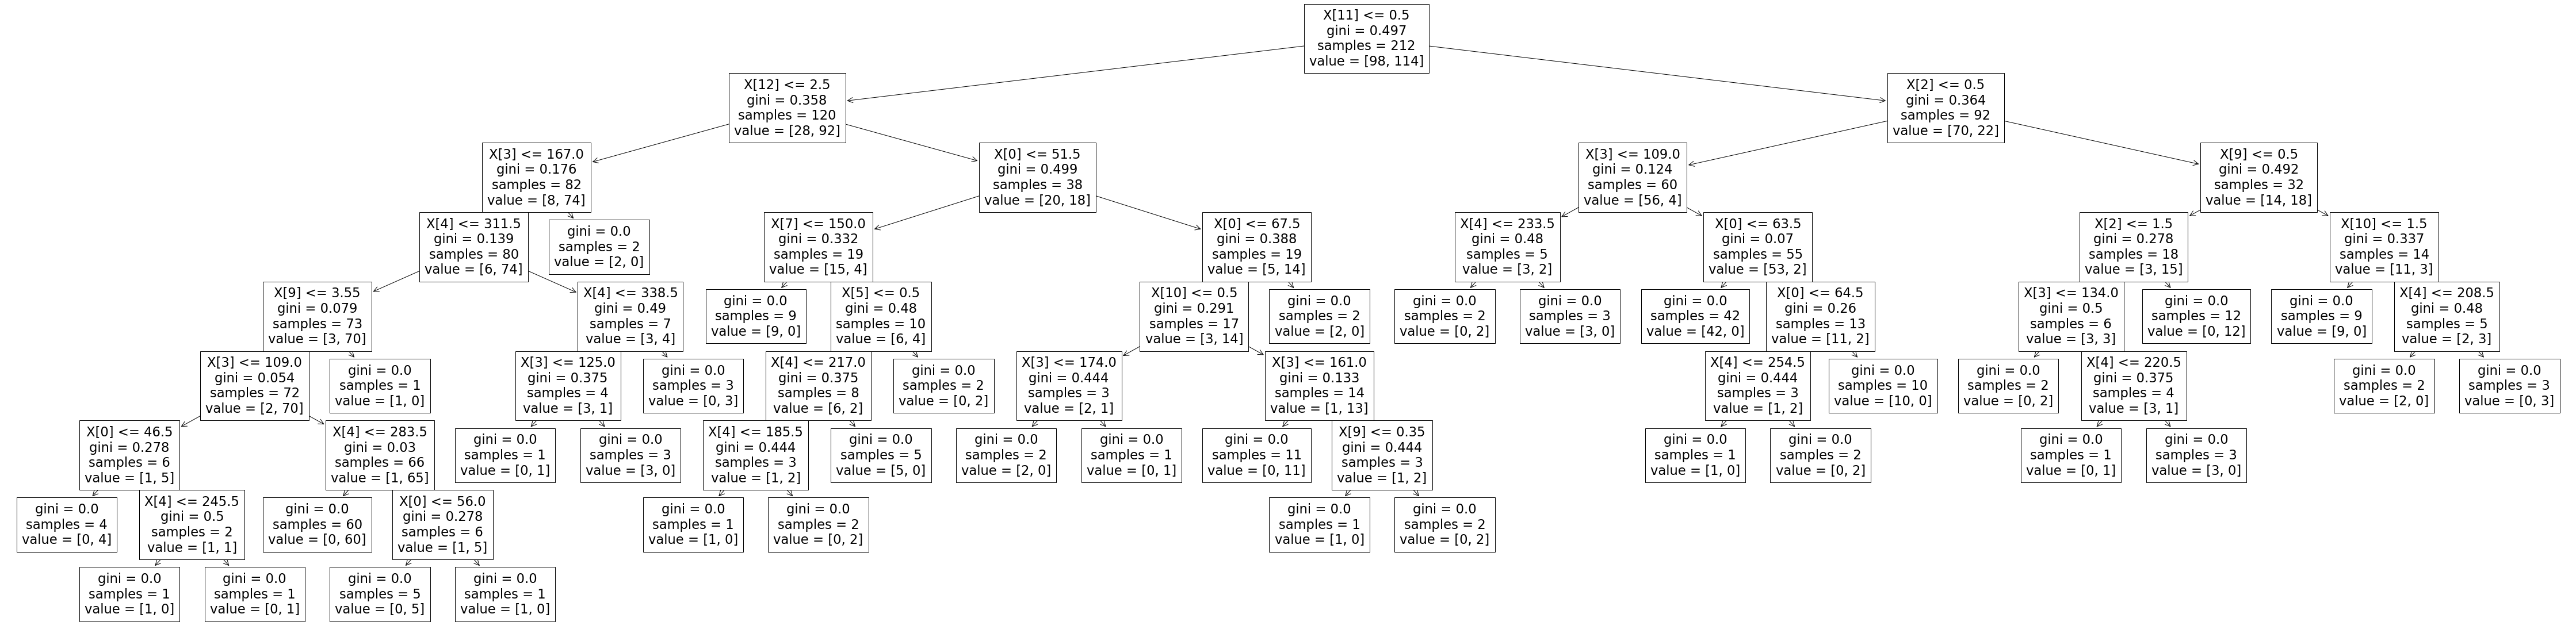

In [9]:
rcParams['figure.figsize'] = 80,20
plot_tree(clf_dt)

### __k = 10 fold Cross Validation__

accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10) 
accuracies.mean() 
accuracies.std()
accuracies

Performance Metrics for fold: 2
tn: 8  fp:  2  fn:  6  tp:  15
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.88      0.71      0.79        21

    accuracy                           0.74        31
   macro avg       0.73      0.76      0.73        31
weighted avg       0.78      0.74      0.75        31


Performance Metrics for fold: 4
tn: 7  fp:  1  fn:  4  tp:  18
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.95      0.82      0.88        22

    accuracy                           0.83        30
   macro avg       0.79      0.85      0.81        30
weighted avg       0.86      0.83      0.84        30


Performance Metrics for fold: 6
tn: 10  fp:  4  fn:  5  tp:  11
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.73      0.69      0.71  

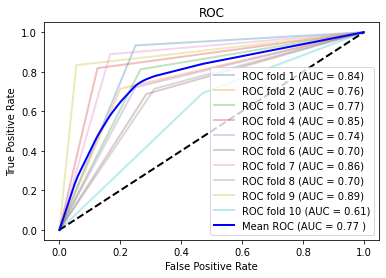

Average Accuracy: 0.7717073653470713


In [10]:
random_state = np.random.RandomState(0)
clf_cv = clf
cv = KFold(n_splits=10,shuffle=False)

fig1 = plt.figure(figsize=[6,4])
ax1 = fig1.add_subplot(111)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,y):
    prediction = clf_cv.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    if (i%2 == 0):
        print("Performance Metrics for fold:", i)
        tn, fp, fn, tp = confusion_matrix(y.iloc[test], prediction[:, 1]).ravel()
        print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
        print(classification_report(y.iloc[test], prediction[:, 1]))
        print()
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
print("Average Accuracy:", np.mean(aucs))

## __Evaluate Predictions of The Fitted Model__

In [11]:
# Reset plots settings
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

y_pred_test_dt = clf_dt.predict(X_test)

tn: 35  fp:  5  fn:  1  tp:  50
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        40
           1       0.91      0.98      0.94        51

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.94      0.93      0.93        91




<Figure size 640x480 with 0 Axes>

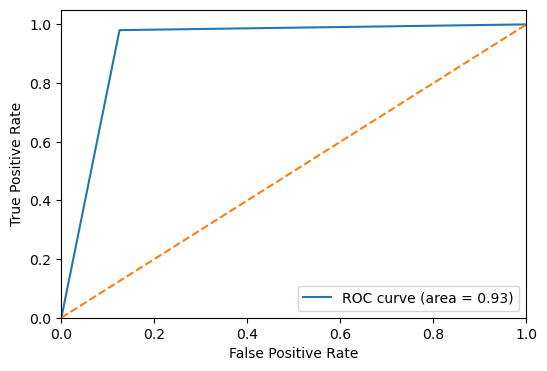

In [12]:
getPerformanceMetric(y_test, y_pred_test_dt)

The J48 algorithm produces a 95% accuracy when used on the test data, hence, we could say that the tree might be generalising well to new data. 

However, that is almost a 20% increase as compared to the initial model even when accuracy was measured using the 10-fold cross validation, hence, this might even be cause by the default hyper-parameter of the Decision Tree Classifier, where overfitting is allowed, and depth isn't limited, and pruning.

Hence, in my opinion, the decision tree fails to generalise the findings of for new data.

## __Hyper-Parameter Tuning__

### __Depth__

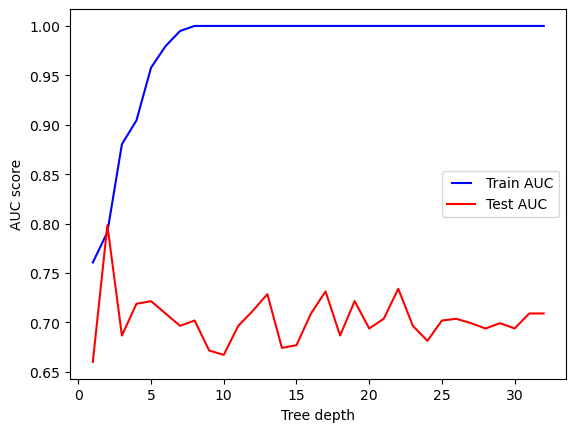

In [13]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf_depth = DecisionTreeClassifier(max_depth=max_depth)
   clf_depth.fit(X_train, y_train)
   train_pred = clf_depth.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = clf_depth.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The decision tree works best when max depth = 3

In [14]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [15]:
def get_dt_Graph(clf):
    plot_tree(clf, feature_names=X_train.columns, class_names=['well', 'ill'])

In [16]:
def getGraphPerformance(clf):
    get_dt_Graph(clf)
    evaluate_model(clf)

Train Accuracy : 0.7924528301886793
Train Confusion Matrix:
[[76 22]
 [22 92]]
--------------------------------------------------
Test Accuracy : 0.8131868131868132
Test Confusion Matrix:
[[27 13]
 [ 4 47]]


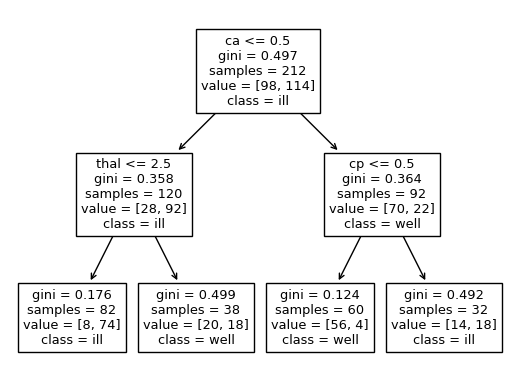

In [17]:
clf_dt_Depth = DecisionTreeClassifier(max_depth=2)
clf_dt_Depth.fit(X_train, y_train)
getGraphPerformance(clf_dt_Depth)

### __Min Samples in Leaf Node__

In [18]:
clf_dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
clf_dt_min_leaf.fit(X_train, y_train)
    

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

Train Accuracy : 0.7924528301886793
Train Confusion Matrix:
[[76 22]
 [22 92]]
--------------------------------------------------
Test Accuracy : 0.8131868131868132
Test Confusion Matrix:
[[27 13]
 [ 4 47]]


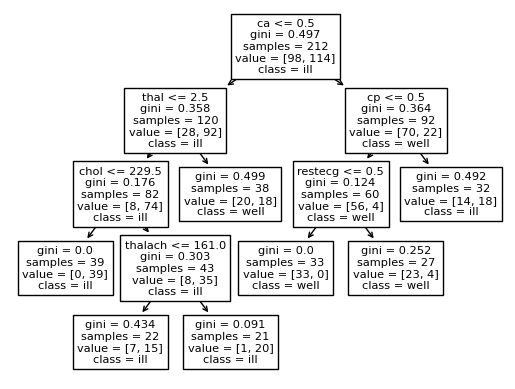

In [19]:
getGraphPerformance(clf_dt_min_leaf)

### __Use Entropy instead of Gini__

Train Accuracy : 0.7924528301886793
Train Confusion Matrix:
[[76 22]
 [22 92]]
--------------------------------------------------
Test Accuracy : 0.8131868131868132
Test Confusion Matrix:
[[27 13]
 [ 4 47]]


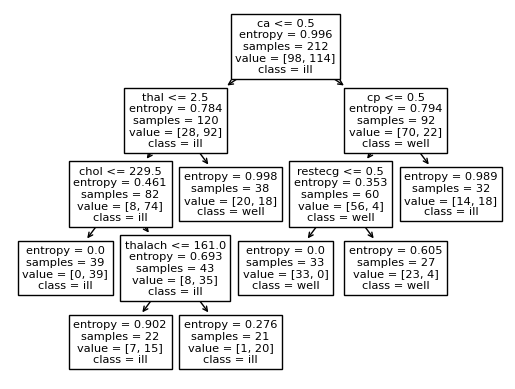

In [20]:
clf_dt_min_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
clf_dt_min_entropy.fit(X_train, y_train)
getGraphPerformance(clf_dt_min_entropy)

## __Hyper Parameter Tuning Search__

In [78]:
def gridSearchHyperTuning(percentage, num):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentage, random_state=1) # 70% training and 30% test
    clf_hpt = DecisionTreeClassifier(random_state=42)
    # Create the parameter grid based on the results of random search 
    params = {
        'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"]
    }
    grid_search = GridSearchCV(estimator=clf_hpt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
    grid_search.fit(X_train, y_train)
    score_df = pd.DataFrame(grid_search.cv_results_)
    clf_dt_best = grid_search.best_estimator_
    # print(score_df.head(5))
    accuracy_train = metrics.accuracy_score(y_train, clf_dt_best.predict(X_train))
    accuracy = metrics.accuracy_score(y_test, clf_dt_best.predict(X_test))
    if (num == 1):
        print("Top 5 best Performing Parameters:")
        print(score_df.nlargest(5,"mean_test_score").shape)
        # ['mean_test_score', 'param_criterion','param_max_depth', 'param_min_samples_leaf'])
        
        print("Performance of the Best Estimator with critereon:", clf_dt_best.criterion,
                                                        ", min_samples_leaf:", clf_dt_best.min_samples_leaf,
                                                        ", max_depth:", clf_dt_best.max_depth)
        getGraphPerformance(clf_dt_best)
        print()
        getPerformanceMetric(y_test, clf_dt_best.predict(X_test))
    else:
        return accuracy, accuracy_train

Fitting 4 folds for each of 50 candidates, totalling 200 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004722      0.000823         0.003999        0.003536   
1       0.004750      0.003031         0.003501        0.001500   
2       0.004252      0.002167         0.002249        0.000431   
3       0.004249      0.000828         0.002502        0.000500   
4       0.003251      0.000435         0.003248        0.001641   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.716981   
1  {'criterion': 'gini',

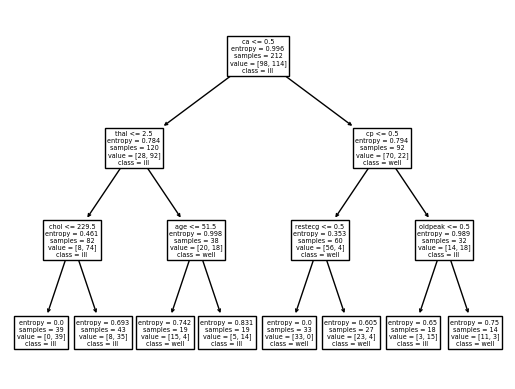

<Figure size 640x480 with 0 Axes>

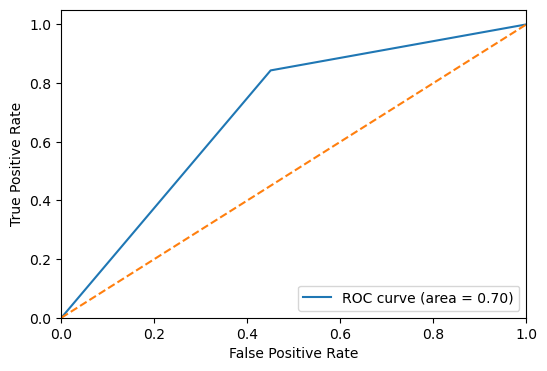

In [79]:
gridSearchHyperTuning(0.3, 1)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Top 5 best Performing Parameters:
(5, 15)
Performance of the Best Estimator with critereon: entropy , min_samples_leaf: 5 , max_depth: 3
Train Accuracy : 0.8632075471698113
Train Confusion Matrix:
[[85 13]
 [16 98]]
--------------------------------------------------
Test Accuracy : 0.7362637362637363
Test Confusion Matrix:
[[27 13]
 [11 40]]

tn: 60  fp:  21  fn:  22  tp:  79
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.79      0.78      0.79       101

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182




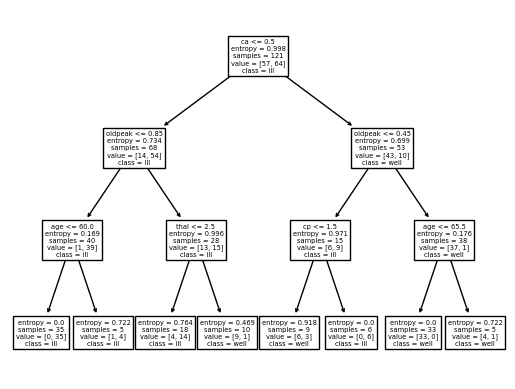

<Figure size 640x480 with 0 Axes>

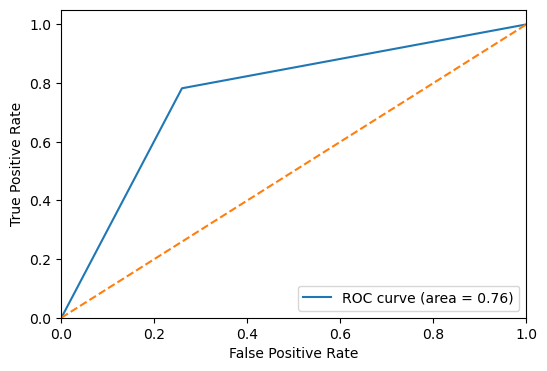

In [49]:
gridSearchHyperTuning(0.6, 1)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Top 5 best Performing Parameters:
(5, 15)
Performance of the Best Estimator with critereon: gini , min_samples_leaf: 10 , max_depth: 2
Train Accuracy : 0.7641509433962265
Train Confusion Matrix:
[[70 28]
 [22 92]]
--------------------------------------------------
Test Accuracy : 0.6703296703296703
Test Confusion Matrix:
[[23 17]
 [13 38]]

tn: 82  fp:  42  fn:  31  tp:  118
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       124
           1       0.74      0.79      0.76       149

    accuracy                           0.73       273
   macro avg       0.73      0.73      0.73       273
weighted avg       0.73      0.73      0.73       273




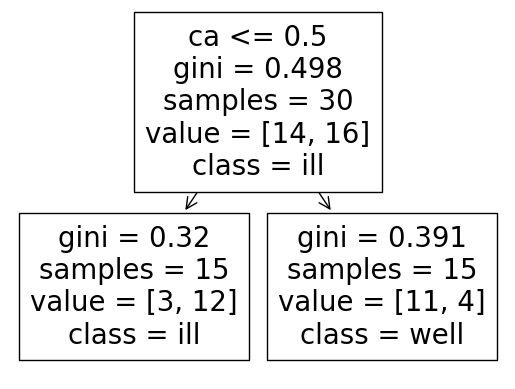

<Figure size 640x480 with 0 Axes>

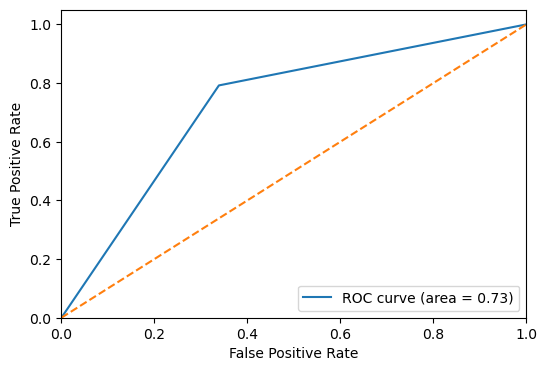

In [50]:
gridSearchHyperTuning(0.9, 1)

In [70]:
acc = []
acc_train = []
for i in range(9):
    if (i>0):
        a, b = gridSearchHyperTuning(i/10, 0)
        acc.append(a)
        acc_train.append(b)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits


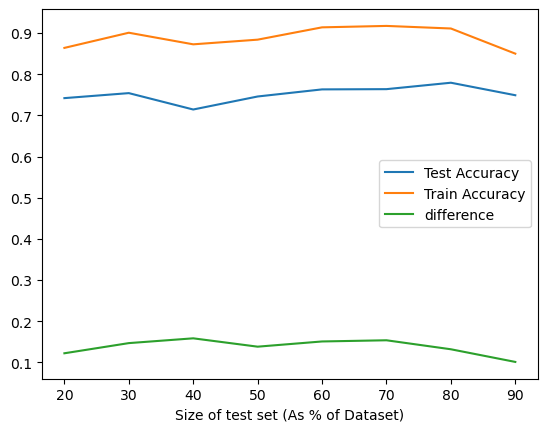

In [75]:
plt.plot(acc)
plt.plot(acc_train)

difference = []
zip_object = zip(acc_train, acc)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)
plt.plot(difference)
x_axis = [20, 30, 40, 50, 60, 70, 80, 90]
x_axis_i = list(range(len(x_axis)))
plt.xticks(x_axis_i, x_axis)
plt.xlabel("Size of test set (As % of Dataset)")
plt.legend(['Test Accuracy', 'Train Accuracy', 'difference'])
plt.show()